In [1]:
#https://www.kaggle.com/datasets/miracle9to9/files1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from pathlib import Path
path=Path("C:/Users/bsai3/Downloads/Malaria Cells/training_set")
images_path={"Uninfected":list(path.glob("Uninfected/*")),"Parasitized":list(path.glob("Parasitized/*"))}
images_path["Uninfected"][:5]

[WindowsPath('C:/Users/bsai3/Downloads/Malaria Cells/training_set/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png'),
 WindowsPath('C:/Users/bsai3/Downloads/Malaria Cells/training_set/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png'),
 WindowsPath('C:/Users/bsai3/Downloads/Malaria Cells/training_set/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_144.png'),
 WindowsPath('C:/Users/bsai3/Downloads/Malaria Cells/training_set/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_21.png'),
 WindowsPath('C:/Users/bsai3/Downloads/Malaria Cells/training_set/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_25.png')]

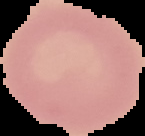

In [4]:
from PIL import Image
img=Image.open(images_path["Uninfected"][1])
img

In [5]:
labels={
    "Uninfected":0,
    "Parasitized":1
}

In [6]:
import imghdr
import os
img_type=["png"]
for i in os.listdir(path):
    for j in os.listdir(os.path.join(path,i)):
        try:
            img=os.path.join(path,i,j)
            type=imghdr.what(img)
            if type not in img_type:
                os.remove(img)
        except exception as e:
            print("problem with this image {}",format(img))

In [7]:
import os
import cv2
images=[]
targets=[]
img_shape=[]
for i in os.listdir(path):
    for j in os.listdir(os.path.join(path,i)):
        img=os.path.join(path,i,j)
        img_data=cv2.imread(str(img))
        if any(dim<128 for dim in img_data.shape):
            resized=cv2.resize(img_data,(128, 128),interpolation=cv2.INTER_AREA)
        else:
            resized=cv2.resize(img_data,(128, 128),interpolation=cv2.INTER_CUBIC)
        img_shape.append(resized.shape)
        images.append(resized)
        targets.append(labels[i])
print(images[15],targets[0])

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 1


In [8]:
import numpy as np
images=np.array(images).astype("float32")
targets=np.array(targets).astype("float32")

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,targets,test_size=0.2)

In [10]:
x_train.shape,y_train.shape

((22046, 128, 128, 3), (22046,))

In [11]:
x_train=x_train/255
x_test=x_test/255

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [38]:
cnn=Sequential([
    layers.Conv2D(10,3),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,activation="sigmoid"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation="sigmoid"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(1,activation="sigmoid")
])
cnn.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [39]:
cnn.fit(x_train,y_train,epochs=25)

Epoch 1/25
689/689 [==============================] - 78s 110ms/step - loss: 0.6934 - accuracy: 0.5535
Epoch 2/25
689/689 [==============================] - 81s 117ms/step - loss: 0.6250 - accuracy: 0.6561
Epoch 3/25
689/689 [==============================] - 76s 111ms/step - loss: 0.5553 - accuracy: 0.7256
Epoch 4/25
689/689 [==============================] - 77s 112ms/step - loss: 0.3309 - accuracy: 0.8920
Epoch 5/25
689/689 [==============================] - 76s 110ms/step - loss: 0.2475 - accuracy: 0.9277
Epoch 6/25
689/689 [==============================] - 77s 112ms/step - loss: 0.2091 - accuracy: 0.9399
Epoch 7/25
689/689 [==============================] - 74s 108ms/step - loss: 0.1929 - accuracy: 0.9435
Epoch 8/25
689/689 [==============================] - 74s 107ms/step - loss: 0.1784 - accuracy: 0.9467
Epoch 9/25
689/689 [==============================] - 73s 107ms/step - loss: 0.1708 - accuracy: 0.9506
Epoch 10/25
689/689 [==============================] - 77s 112ms/step - l

In [40]:
predictions=cnn.predict(x_test)
binary_predictions=[]
for pred in predictions:
    if pred>0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)
binary_predictions

173/173 [==============================] - 5s 27ms/step


[0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,


In [41]:
cnn.evaluate(x_test,y_test)

173/173 [==============================] - 5s 29ms/step - loss: 0.1645 - accuracy: 0.9552


[0.16454339027404785, 0.9551886916160583]

173/173 [==============================] - 4s 25ms/step


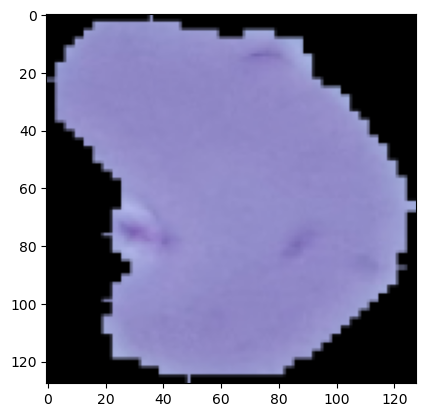

In [44]:
predictions=cnn.predict(x_test)
plt.imshow(x_test[0])

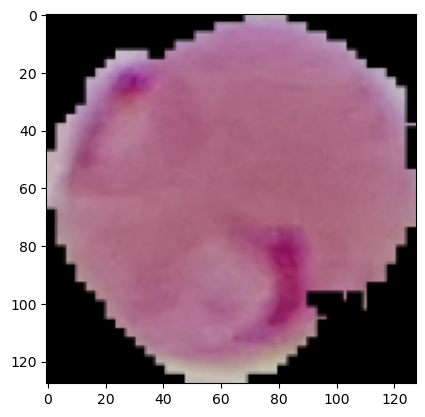

In [45]:
plt.imshow(x_test[1])